Libraries and some color default settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

!pip install highlight_text
import highlight_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#set default colors
text_color = 'white'
background = 'black'

# FBREF webscraping and data engineering

In [ ]:
# POSSESSION DATA

url_possesion = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats#stats_possession'
dfs_possesion = pd.read_html(url_possesion)

df_possesion = dfs_possesion[0]

df_possesion.columns = [' '.join(col).strip() for col in df_possesion.columns]
df_possesion = df_possesion.reset_index(drop=True)

# create a list with the new names for the columns
new_columns_possesion = []
for col in df_possesion.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # take the last player name
    else:
        new_col = col
    new_columns_possesion.append(new_col)

# rename columns
df_possesion.columns = new_columns_possesion

df_possesion = df_possesion.fillna(0)

# PASSING DATA
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats#stats_passing'
dfs_passing = pd.read_html(url_passing)

df_passing = dfs_passing[0]

df_passing.columns = [' '.join(col).strip() for col in df_passing.columns]
df_passing = df_passing.reset_index(drop=True)

# criar uma lista com os novos nomes de colunas
new_columns_passing = []
for col in df_passing.columns:
    if 'level_0' in col:
        new_col = col.split()[-1]  # pega a última palavra do nome
    else:
        new_col = col
    new_columns_passing.append(new_col)

# renomear as colunas
df_passing.columns = new_columns_passing

df_passing = df_passing.fillna(0)


df = pd.merge(df_passing,df_possesion,on=['Player','Squad','Age','Rk','Matches','Nation','Pos','Comp','90s','Born'], suffixes=('_left', '_right'))

df = df.rename(columns={'Pos': 'Position',
                        'Total Cmp': 'Passes completed',
                        'Total Att': 'Passes attempted',
                        'Total Cmp%': 'Passes completed %',
                        'Total TotDist': 'Passing distance',
                        'Total PrgDist': 'Progressive passing distance' ,
                        'Short Cmp': 'Short passes completed',
                        'Short Att': 'Short passes attempted',
                        'Short Cmp%': 'Short passes completed %',
                        'Medium Cmp': 'Medium passes completed',
                        'Medium Att': 'Medium passes attempted',
                        'Medium Cmp%': 'Medium passes completed %',
                        'Long Cmp': 'Long passes completed',
                        'Long Att': 'Long passes attempted',
                        'Long Cmp%': 'Long passes completed %',
                        'Ast': 'Assists',
                        'xAG': 'Expected assisted goals',
                        'xA': 'Expected assists',
                        'A-xAG': 'A-xAG',
                        'KP': 'Key passes',
                        '1/3': 'Passes into final 3rd',
                        'PPA': 'Passes into penalty area',
                        'CrsPA': 'Crosses into Penalty Area',
                        'PrgP': 'Progressive passes',
                        'Matches': 'Matches',
                        'Touches Touches': 'Touches',
                        'Touches Def Pen': 'Def Pen touches ',
                        'Touches Def 3rd': 'Def 3rd touches ',
                        'Touches Mid 3rd': 'Mid 3rd touches ',
                        'Touches Att 3rd': 'Att 3rd touches ',
                        'Touches Att Pen': 'Att Pen touches',
                        'Touches Live': 'Live-ball touches',
                        'Take-Ons Att': 'Take-Ons attempted',
                        'Take-Ons Succ': 'Successful take-Ons',
                        'Take-Ons Succ%': 'Successful take-Ons %',
                        'Take-Ons Tkld': 'Times Tackled During Take-On',
                        'Take-Ons Tkld%': 'Tackled During Take-On %',
                        'Carries Carries': 'Carries',
                        'Carries TotDist': 'Carrying distance',
                        'Carries PrgDist': 'Progressive carrying distance',
                        'Carries PrgC': 'Progressive carries',
                        'Carries 1/3': 'Carries into final 3rd',
                        'Carries CPA': 'Carries into penalty area',
                        'Carries Mis': 'Miscontrols',
                        'Carries Dis': 'Dispossessed',
                        'Receiving Rec': 'Passes received',
                        'Receiving PrgR': 'Progressive passes received'
                        })

numeric_columns = ['90s', 'Passes completed', 'Passes attempted', 'Passes completed %',
       'Passing distance', 'Progressive passing distance', 'Short passes completed',
       'Short passes attempted', 'Short passes completed %',
       'Medium passes completed', 'Medium passes attempted',
       'Medium passes completed %', 'Long passes completed',
       'Long passes attempted', 'Long passes completed %', 'Assists',
       'Expected assisted goals', 'Expected assists', 'A-xAG', 'Key passes',
       'Passes into final 3rd', 'Passes into penalty area',
       'Crosses into Penalty Area', 'Progressive passes', 'Matches', 'Touches',
       'Def Pen touches ', 'Def 3rd touches ', 'Mid 3rd touches ',
       'Att 3rd touches ', 'Att Pen touches', 'Live-ball touches',
       'Take-Ons attempted', 'Successful take-Ons', 'Successful take-Ons %',
       'Times Tackled During Take-On', 'Tackled During Take-On %', 'Carries',
       'Carrying distance', 'Progressive carrying distance',
       'Progressive carries', 'Carries into final 3rd',
       'Carries into penalty area', 'Miscontrols', 'Dispossessed',
       'Passes received', 'Progressive passes received']

for j in numeric_columns:
  df[j] = pd.to_numeric(df[j], errors='coerce')

ninety_columns = ['Passes completed', 'Passes attempted',
       'Passing distance', 'Progressive passing distance', 'Short passes completed',
       'Short passes attempted','Medium passes completed',
       'Medium passes attempted','Long passes completed',
       'Long passes attempted','Assists','Expected assisted goals',
       'Expected assists', 'A-xAG', 'Key passes',
       'Passes into final 3rd', 'Passes into penalty area',
       'Crosses into Penalty Area', 'Progressive passes', 'Matches', 'Touches',
       'Def Pen touches ', 'Def 3rd touches ', 'Mid 3rd touches ',
       'Att 3rd touches ', 'Att Pen touches', 'Live-ball touches',
       'Take-Ons attempted', 'Successful take-Ons',
       'Times Tackled During Take-On', 'Carries',
       'Carrying distance', 'Progressive carrying distance',
       'Progressive carries', 'Carries into final 3rd',
       'Carries into penalty area', 'Miscontrols', 'Dispossessed',
       'Passes received', 'Progressive passes received']

df = df[df['90s'] > 0]

for i in ninety_columns:
  df[i] = (df[i]/df['90s']).round(2)


df['Age'] = df['Age'].str[:2]
df['Position_2'] = df['Position'].str[3:]
df['Position'] = df['Position'].str[:2]
df['Nation'] = df['Nation'].str.split(' ').str.get(1)
df['League'] = df['Comp'].str.split(' ').str.get(1)
df['League_'] = df['Comp'].str.split(' ').str.get(2)
df['League'] = df['League'] + ' ' + df['League_']
df = df.drop(columns=['League_','Comp','Rk','Matches'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 16107
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         2832 non-null   object 
 1   Nation                         2832 non-null   object 
 2   Position                       2832 non-null   object 
 3   Squad                          2832 non-null   object 
 4   Age                            2832 non-null   object 
 5   Born                           2832 non-null   object 
 6   90s                            2832 non-null   float64
 7   Passes completed               2832 non-null   float64
 8   Passes attempted               2832 non-null   float64
 9   Passes completed %             2832 non-null   float64
 10  Passing distance               2832 non-null   float64
 11  Progressive passing distance   2832 non-null   float64
 12  Short passes completed         2832 non-null   

In [5]:
df.head()

,Player,Nation,Position,Squad,Age,Born,90s,Passes completed,Passes attempted,Passes completed %,...,Progressive carrying distance,Progressive carries,Carries into final 3rd,Carries into penalty area,Miscontrols,Dispossessed,Passes received,Progressive passes received,Position_2,League
0,Brenden Aaronson,USA,MF,Leeds United,21,2000,26.4,22.42,30.19,74.3,...,58.03,1.63,1.29,0.49,2.69,3.11,29.05,5.72,FW,Premier League
1,Paxten Aaronson,USA,MF,Eint Frankfurt,18,2003,1.9,26.84,37.37,71.8,...,75.26,4.21,1.05,1.05,2.63,1.05,34.21,7.89,DF,NaN
2,James Abankwah,IRL,DF,Udinese,18,2004,0.7,32.86,41.43,79.3,...,27.14,0.00,0.00,0.00,1.43,1.43,30.00,0.00,,Serie A
4,Yunis Abdelhamid,MAR,DF,Reims,34,1987,37.0,45.38,54.89,82.7,...,165.49,1.08,0.57,0.08,0.73,0.62,40.51,0.27,,Ligue 1
5,Himad Abdelli,ALG,MF,Angers,22,1999,23.7,44.01,53.04,83.0,...,138.99,2.45,2.53,0.30,1.52,0.84,44.98,4.68,FW,Ligue 1


In [6]:
# filter the dataframe so it is only players who have played more than 14 90's which is about 1260 minutes
df = df[df['90s']>=14].reset_index()
# only for non gks
df = df[(df['Position'] != 'GK') & (df['Position_2'] != 'GK')]
df.head()

,index,Player,Nation,Position,Squad,Age,Born,90s,Passes completed,Passes attempted,...,Progressive carrying distance,Progressive carries,Carries into final 3rd,Carries into penalty area,Miscontrols,Dispossessed,Passes received,Progressive passes received,Position_2,League
0,0,Brenden Aaronson,USA,MF,Leeds United,21,2000,26.4,22.42,30.19,...,58.03,1.63,1.29,0.49,2.69,3.11,29.05,5.72,FW,Premier League
1,4,Yunis Abdelhamid,MAR,DF,Reims,34,1987,37.0,45.38,54.89,...,165.49,1.08,0.57,0.08,0.73,0.62,40.51,0.27,,Ligue 1
2,5,Himad Abdelli,ALG,MF,Angers,22,1999,23.7,44.01,53.04,...,138.99,2.45,2.53,0.30,1.52,0.84,44.98,4.68,FW,Ligue 1
3,6,Salis Abdul Samed,GHA,MF,Lens,22,2000,32.2,56.49,61.52,...,107.36,1.02,1.74,0.09,1.21,0.99,52.95,1.37,,Ligue 1
4,7,Laurent Abergel,FRA,MF,Lorient,29,1993,26.0,50.31,57.04,...,99.88,0.50,1.12,0.00,1.12,0.73,48.35,0.54,,Ligue 1


In [7]:
df = df.sort_values(by='Progressive carrying distance',ascending=False)

In [8]:
df.head(5)

,index,Player,Nation,Position,Squad,Age,Born,90s,Passes completed,Passes attempted,...,Progressive carrying distance,Progressive carries,Carries into final 3rd,Carries into penalty area,Miscontrols,Dispossessed,Passes received,Progressive passes received,Position_2,League
808,14966,Facundo Medina,ARG,DF,Lens,23,1999,30.9,73.14,81.10,...,267.28,2.62,2.04,0.03,0.71,0.68,67.96,0.97,,Ligue 1
1199,15822,Arthur Theate,BEL,DF,Rennes,22,2000,34.7,66.17,74.01,...,232.91,1.07,1.01,0.00,0.43,0.14,62.33,0.12,,Ligue 1
593,14527,Frenkie de Jong,NED,MF,Barcelona,25,1997,28.2,74.08,82.27,...,227.38,3.26,3.37,0.32,0.85,0.78,72.20,2.94,,La Liga
1256,15944,Marco Verratti,ITA,MF,Paris S-G,29,1992,24.4,97.66,105.45,...,226.60,1.64,3.24,0.20,0.70,1.35,93.20,2.13,,Ligue 1
326,13953,Rúben Dias,POR,DF,Manchester City,25,1997,22.2,86.85,93.69,...,226.35,0.63,0.99,0.05,0.05,0.18,80.68,0.09,,Premier League


In [9]:
df[df['Squad']=='Liverpool'].set_index('Player')#.loc['Trent Alexander-Arnold','Progressive carrying distance']

,index,Nation,Position,Squad,Age,Born,90s,Passes completed,Passes attempted,Passes completed %,...,Progressive carrying distance,Progressive carries,Carries into final 3rd,Carries into penalty area,Miscontrols,Dispossessed,Passes received,Progressive passes received,Position_2,League
Player,,,,,,,,,,,,,,,,,,,,,
Joe Gomez,14264,ENG,DF,Liverpool,25,1997,16.3,71.53,83.50,85.7,...,160.49,0.92,0.74,0.00,0.80,0.31,63.80,0.31,,Premier League
Andrew Robertson,15468,SCO,DF,Liverpool,28,1994,28.7,62.82,78.92,79.6,...,137.07,2.79,2.09,0.35,1.08,0.24,57.04,6.76,,Premier League
Ibrahima Konaté,14632,FRA,DF,Liverpool,23,1999,17.2,57.44,65.99,87.0,...,108.78,0.41,0.41,0.00,0.70,0.23,53.37,0.29,,Premier League
Harvey Elliott,14062,ENG,MF,Liverpool,19,2003,17.9,45.20,56.37,80.2,...,108.55,3.02,2.23,0.56,1.45,1.28,48.44,7.21,FW,Premier League
Trent Alexander-Arnold,13296,ENG,DF,Liverpool,23,1998,32.5,67.32,89.60,75.1,...,101.91,1.32,1.20,0.25,1.08,0.65,62.83,4.28,,Premier League
Virgil van Dijk,15922,NED,DF,Liverpool,31,1991,31.5,74.44,82.29,90.5,...,100.06,0.32,0.44,0.06,0.22,0.00,66.19,0.25,,Premier League
Jordan Henderson,14393,ENG,MF,Liverpool,32,1990,23.0,58.30,70.22,83.0,...,88.96,1.61,2.13,0.04,0.78,0.39,57.35,3.91,,Premier League
Mohamed Salah,15555,EGY,FW,Liverpool,30,1992,36.6,24.64,32.38,76.1,...,82.95,3.28,1.80,2.38,3.01,2.16,35.66,11.50,,Premier League
Darwin Núñez,15163,URU,FW,Liverpool,23,1999,18.8,13.72,21.33,64.3,...,74.89,3.24,1.76,1.65,2.18,1.44,26.12,9.63,,Premier League


 # Beeswarm Plot for one metric

Write player 1 name:Bruno Fernandes
Write player 2 name:Bernardo Silva


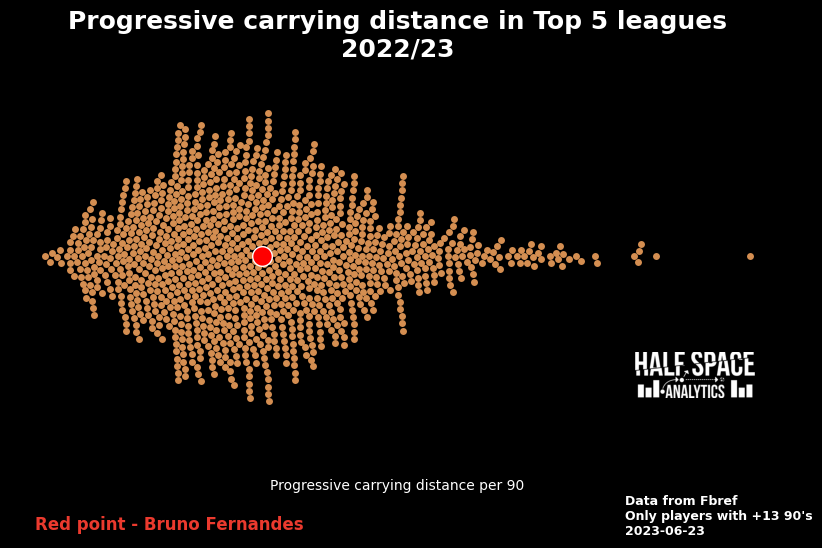

In [10]:
from PIL import Image
from datetime import date
fig, ax = plt.subplots(figsize=(10,5))

fig.set_facecolor(background)
ax.patch.set_facecolor(background)

metric = 'Progressive carrying distance'
player1 = str(input('Write player 1 name:'))
player2 = str(input('Write player 2 name:'))

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x=metric,data=df,color='#D48E51',zorder=1)

plt.scatter(x=df.set_index('Player').loc[player1,metric],y=0,c='red',edgecolor='white',s=200,zorder=2)
#plt.text(s='TAA',x=df.set_index('Player').loc[player1,metric],y=-.04,c='red',fontweight='heavy')

#plt.scatter(x=df.set_index('Player').loc[player2,metric],y=0,c='blue',edgecolor='white',s=200,zorder=2)
#plt.text(s='BF',x=df.set_index('Player').loc[player2,metric],y=-.04,c='blue',fontweight='heavy')

plt.title(metric + ' in Top 5 leagues\n2022/23',c=text_color,fontsize=18,fontweight='heavy')

plt.xlabel(metric + ' per 90',c=text_color)

ax2 = fig.add_axes([.75,.2,.12,.12])
ax2.axis('off')
img = Image.open('/content/Half Space Branco.png')
ax2.imshow(img)

today = date.today()

fig.text(0.15,-0.05, s='Red point - ' + player1 , fontsize=12, fontweight='bold', color='#EB3A2E')
fig.text(0.74,-0.06, s="Data from Fbref\nOnly players with +13 90's\n" + str(today), fontsize=9, fontweight='bold',color='white')

plt.savefig(player1 + 'swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [11]:
df.columns

Index(['index', 'Player', 'Nation', 'Position', 'Squad', 'Age', 'Born', '90s',
       'Passes completed', 'Passes attempted', 'Passes completed %',
       'Passing distance', 'Progressive passing distance',
       'Short passes completed', 'Short passes attempted',
       'Short passes completed %', 'Medium passes completed',
       'Medium passes attempted', 'Medium passes completed %',
       'Long passes completed', 'Long passes attempted',
       'Long passes completed %', 'Assists', 'Expected assisted goals',
       'Expected assists', 'A-xAG', 'Key passes', 'Passes into final 3rd',
       'Passes into penalty area', 'Crosses into Penalty Area',
       'Progressive passes', 'Touches', 'Def Pen touches ', 'Def 3rd touches ',
       'Mid 3rd touches ', 'Att 3rd touches ', 'Att Pen touches',
       'Live-ball touches', 'Take-Ons attempted', 'Successful take-Ons',
       'Successful take-Ons %', 'Times Tackled During Take-On',
       'Tackled During Take-On %', 'Carries', 'Carrying di

In [12]:
# create a list of 6 metrics to compare
metrics = ['Expected assisted goals','Progressive carrying distance','Progressive passing distance','Carries into penalty area','Progressive passes','Key passes']

# Beeswarm plot for more than one metric

Write the player name: Bernardo Silva


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


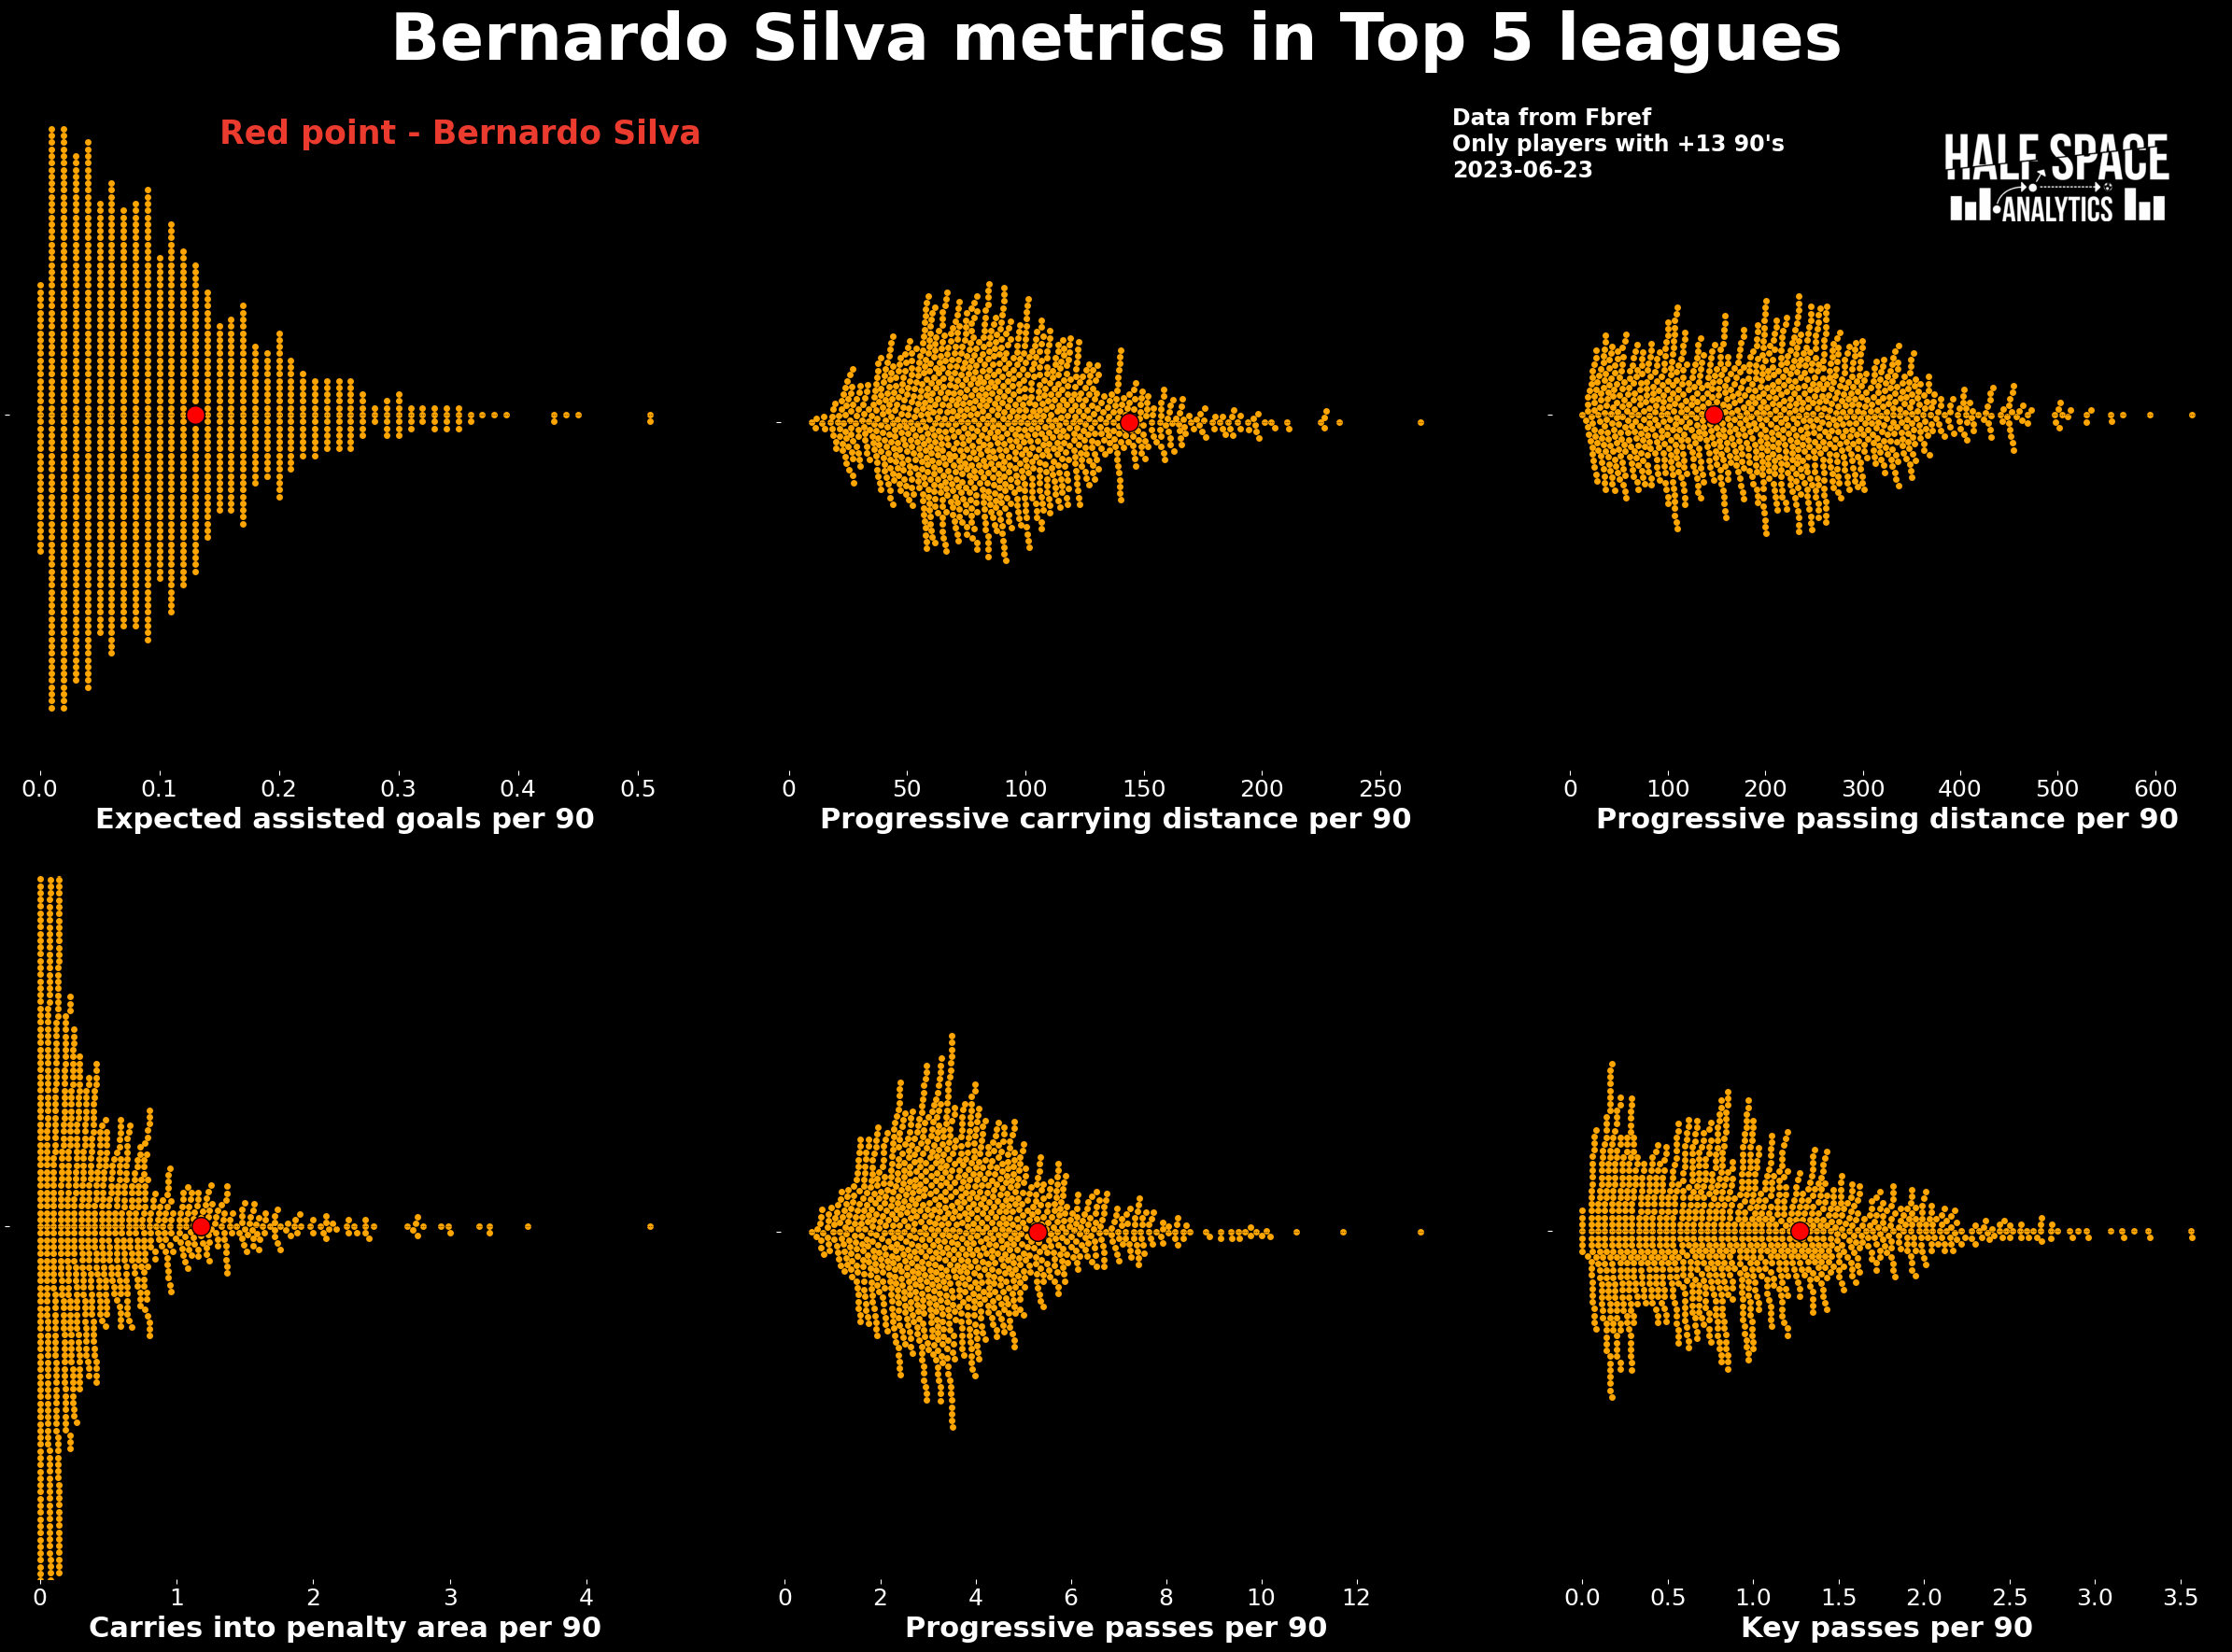

In [13]:
# Defina as dimensões da imagem e a cor de fundo
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 18), facecolor='black')

player3 = str(input("Write the player name: "))

colors = {player3: 'red'}

for ax, metric in zip(axs.flat, metrics):
    sns.swarmplot(x=metric, data=df, color='orange', zorder=1, ax=ax)
    for player, color in colors.items():
        x = df.set_index('Player').loc[player, metric]
        ax.scatter(x, 0, c=color, edgecolor='black', s=200, zorder=2)
        #ax.text(s=player.split()[1], x=x, y=-.04, c=color, fontweight='heavy')

    #ax.set_title(f'{metric} in the Premier League 2022/23', c=text_color, fontsize=16, fontweight='heavy')
    ax.set_xlabel(f'{metric} per 90', c=text_color,fontsize=22, fontweight='heavy')
    ax.grid(ls='dotted', lw=.5, color='black', axis='y', zorder=1)
    ax.tick_params(labelsize=18)
    for x in ['top', 'bottom', 'left', 'right']:
        ax.spines[x].set_visible(False)
    ax.patch.set_facecolor('black')

fig.suptitle(player3 +' metrics in Top 5 leagues', fontsize=50, fontweight='bold', c=text_color)

# Adjust the space between subplots
fig.tight_layout()
fig.subplots_adjust(hspace=0.15)
fig.subplots_adjust(wspace=0.15)

ax2 = fig.add_axes([.87,.83,.1,.1])
ax2.axis('off')
img = Image.open('/content/Half Space Branco.png')
ax2.imshow(img)

today = date.today()

fig.text(0.1,0.9, s='Red point - ' + player3 , fontsize=25, fontweight='bold', color='#EB3A2E')
fig.text(0.65,0.88, s="Data from Fbref\nOnly players with +13 90's\n" + str(today), fontsize=17, fontweight='bold',color='white')

plt.savefig(player3 + 'beeswarms.png',dpi=500,bbox_inches = 'tight',facecolor='black')